Name : Justin Joseph
Student Id : 8786567

Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB
None

Class Distribution:
class
1    564
0    192
Name: count, dtype: int64
   id  gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses   
0   0       1  0.85247  0.71826  0.57227        240               239  \
1   0       1  0.76686  0.69481  0.53966        234               233   
2   0       1  0.85083  0.67604  0.58982        232               231   
3   1       0  0.41121  0.79672  0.59257        178               177   
4   1       0  0.32790  0.79782  0.53028        236               235   

   meanPeriodPulses  stdDevPeriodPulses  locPctJitter  ...   
0          0.008064            0.000087       0.00218  ...  \
1          0.008258            0.000073       0.00195  ...   
2          0.008340            0.000060       0.00176  ...   
3          0.010858            0.000183       0.00419  ...   


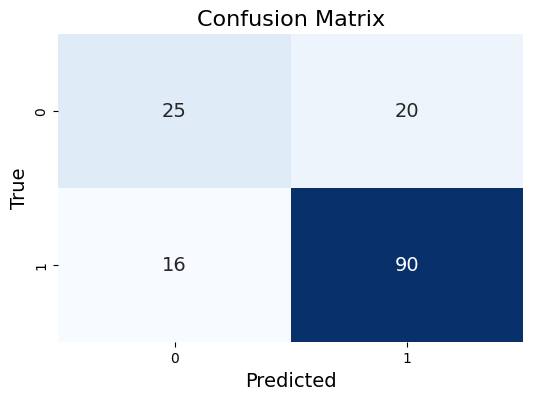

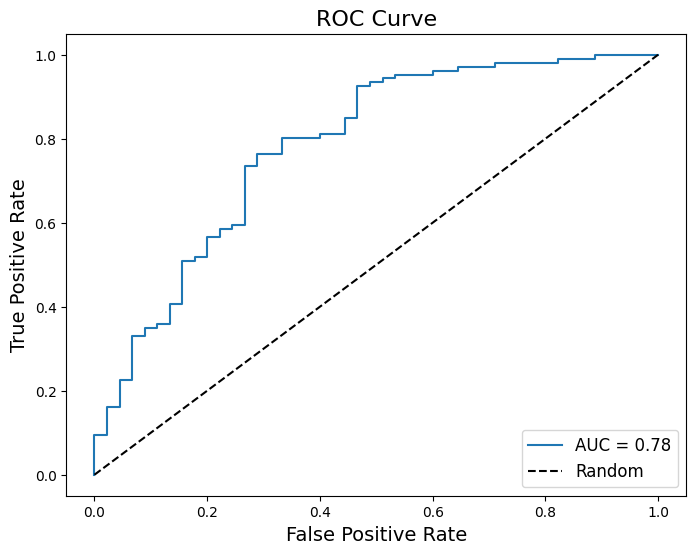

ROC Curve Data:
-------------
False Positive Rate (FPR)   True Positive Rate (TPR)
0.0000                     0.0000
0.0000                     0.0094
0.0000                     0.0943
0.0222                     0.0943
0.0222                     0.1604
0.0444                     0.1604
0.0444                     0.2264
0.0667                     0.2264
0.0667                     0.3302
0.0889                     0.3302
0.0889                     0.3491
0.1111                     0.3491
0.1111                     0.3585
0.1333                     0.3585
0.1333                     0.4057
0.1556                     0.4057
0.1556                     0.5094
0.1778                     0.5094
0.1778                     0.5189
0.2000                     0.5189
0.2000                     0.5660
0.2222                     0.5660
0.2222                     0.5849
0.2444                     0.5849
0.2444                     0.5943
0.2667                     0.5943
0.2667                     0.7358

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

df = pd.read_csv("pd_speech_features.csv")

print("Dataset Summary:")
print(df.info())
print("\nClass Distribution:")
print(df['class'].value_counts())

print(df.head())

df.drop_duplicates(inplace=True)

corrMatrix = df.corr().abs()
upperTri = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(bool))
toDrop = [column for column in upperTri.columns if any(upperTri[column] > 0.8)]
df.drop(columns=toDrop, inplace=True)

X = df.drop(columns=['class'])
y = df['class']

XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
XTrainScaled = scaler.fit_transform(XTrain)
XTestScaled = scaler.transform(XTest)

svmModel = SVC(kernel='linear', C=1.0, random_state=42)
svmModel.fit(XTrainScaled, yTrain)

yPred = svmModel.predict(XTestScaled)
accuracy = accuracy_score(yTest, yPred)
print("Model Accuracy:", accuracy)

cm = confusion_matrix(yTest, yPred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('True', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

yPredProb = svmModel.decision_function(XTestScaled)
fpr, tpr, thresholds = roc_curve(yTest, yPredProb)
rocAuc = roc_auc_score(yTest, yPredProb)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {rocAuc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.show()

print("ROC Curve Data:")
print("-------------")
print("False Positive Rate (FPR)   True Positive Rate (TPR)")
for i in range(len(fpr)):
    print(f"{fpr[i]:.4f}                     {tpr[i]:.4f}")

print("\nAUC Score:", rocAuc)


The AUC (Area Under the Curve) Score is 0.7826. The AUC score measures the overall performance of the binary classifier, and it represents the area under the ROC curve. A value closer to 1 indicates a better-performing classifier.

The class distribution of the dataset shows that there are 564 instances of Class 1 and 192 instances of Class 0 in the dataset.

The model accuracy is 0.7616, which means that the SVM model achieved an accuracy of approximately 76.16% on the test data.

The SVM model achieved a reasonable accuracy of 76.16% in predicting Parkinson's disease based on the given dataset. The ROC curve and AUC score provide insights into the model's performance in distinguishing between the two classes. However, further analysis and evaluation is required to fine-tune the model or explore other evaluation metrics to gain a comprehensive understanding of its performance.